In [16]:
import numpy as np
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [31]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [32]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [19]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수1,강우A1,강우B1,강우C1,강우D1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,6.4,7,7,7,8,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.610
1,1.0,2006.0,7.0,10.0,9.0,6.3,7,8,7,8,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.600
2,1.0,2006.0,7.0,10.0,10.0,6.4,7,9,7,8,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.590
3,1.0,2006.0,7.0,10.0,11.0,7.3,7,10,7,8,...,14,2.53,122.620,11.3,9,10,15,14,2.53,122.585
4,1.0,2006.0,7.0,10.0,12.0,8.2,7,12,8,10,...,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575


In [20]:
y.head()

0    189.100000
1    216.951962
2    251.424419
3    302.812199
4    384.783406
Name: 유입량, dtype: float64

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [61]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
predict = rf.predict(X_test)
expected = y_test

In [63]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 592.693663169309


<function matplotlib.pyplot.show(close=None, block=None)>

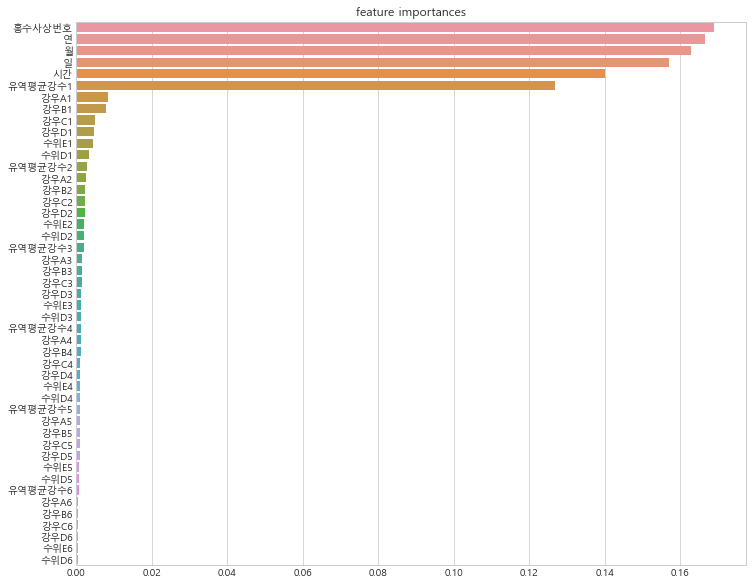

In [67]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

In [16]:
param_grid = {
    'n_estimators' : [10, 30, 50, 100, 200],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [3, 5, 7, 10],
    'min_samples_split' : [2, 3, 5, 10]
}

In [18]:
rf_grid = GridSearchCV(rf, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:  7.4min finished


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [3, 5, 7, 10],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [27]:
print('점수 : {}'.format(np.sqrt(-rf_grid.best_score_)))
print('최적 파라미터 : {}'.format(rf_grid.best_params_))

점수 : 1077.6507091150727
최적 파라미터 : {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}


In [20]:
rf = RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=3)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=3)

In [21]:
predict = rf.predict(X_test)
expected = y_test

In [22]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 515.8016557382389


## 유역평균강수 제거

In [39]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")

In [40]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [41]:
X = X.drop(['유역평균강수1', '유역평균강수2', '유역평균강수3', '유역평균강수4', '유역평균강수5', '유역평균강수6'], axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [43]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
predict = rf.predict(X_test)
expected = y_test

In [45]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 626.6936122884766


<function matplotlib.pyplot.show(close=None, block=None)>

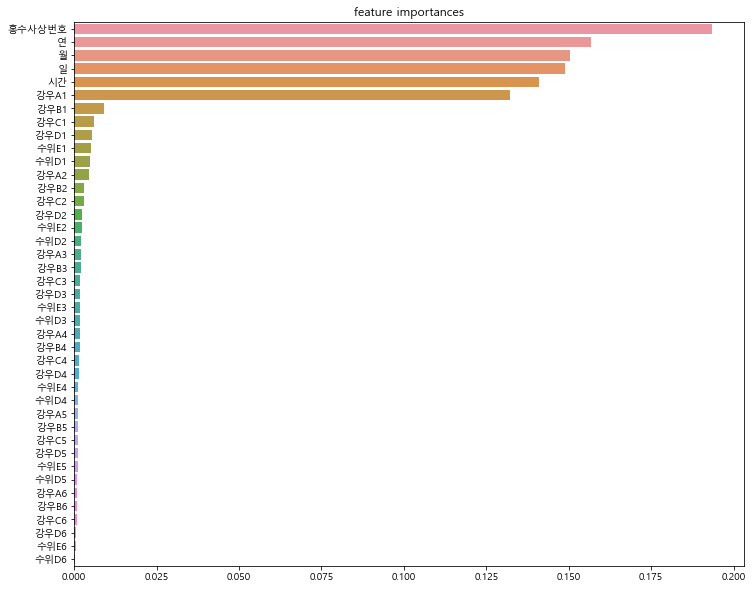

In [46]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

## 파생변수 생성

In [58]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [59]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [60]:
X['강우E1'] = X['유역평균강수1']*5 - X['강우A1'] - X['강우B1'] - X['강우C1'] - X['강우D1']
X['강우E2'] = X['유역평균강수2']*5 - X['강우A2'] - X['강우B2'] - X['강우C2'] - X['강우D2']
X['강우E3'] = X['유역평균강수3']*5 - X['강우A3'] - X['강우B3'] - X['강우C3'] - X['강우D3']
X['강우E4'] = X['유역평균강수4']*5 - X['강우A4'] - X['강우B4'] - X['강우C4'] - X['강우D4']
X['강우E5'] = X['유역평균강수5']*5 - X['강우A5'] - X['강우B5'] - X['강우C5'] - X['강우D5']
X['강우E6'] = X['유역평균강수6']*5 - X['강우A6'] - X['강우B6'] - X['강우C6'] - X['강우D6']

In [61]:
X = X.drop(['유역평균강수1', '유역평균강수2', '유역평균강수3', '유역평균강수4', '유역평균강수5', '유역평균강수6'], axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [63]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [64]:
predict = rf.predict(X_test)
expected = y_test

In [65]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 571.7844671283027


<function matplotlib.pyplot.show(close=None, block=None)>

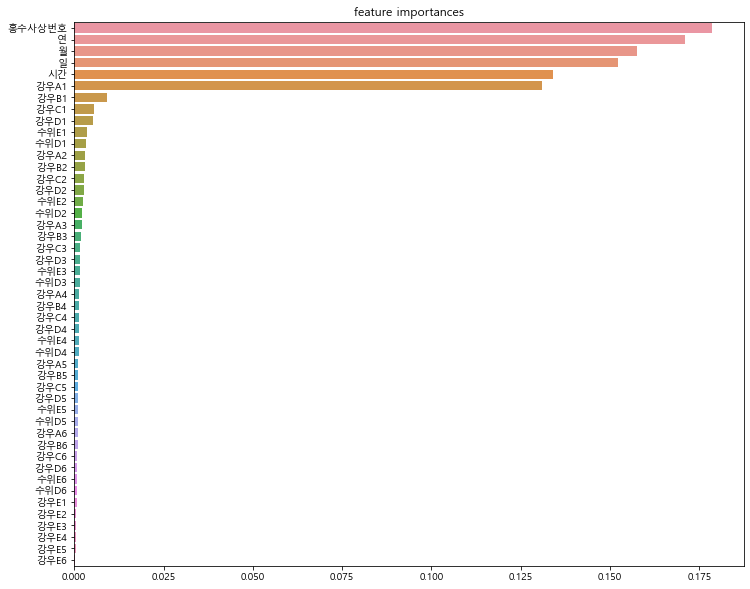

In [66]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

## 1~5열 데이터 삭제

In [7]:
X = X.drop(X.iloc[:,0:5], axis=1)

In [8]:
X.head()

,유역평균강수1,강우A1,강우B1,강우C1,강우D1,수위E1,수위D1,유역평균강수2,강우A2,강우B2,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,6.4,7,7,7,8,2.54,122.56875,6.3,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.610
1,6.3,7,8,7,8,2.53,122.56250,6.4,7,8,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.600
2,6.4,7,9,7,8,2.53,122.55625,7.3,7,9,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.590
3,7.3,7,10,7,8,2.53,122.55625,8.2,7,10,...,14,2.53,122.620,11.3,9,10,15,14,2.53,122.585
4,8.2,7,12,8,10,2.53,122.55625,11.3,9,12,...,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [10]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
predict = rf.predict(X_test)
expected = y_test

In [12]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 662.659381464761


<function matplotlib.pyplot.show(close=None, block=None)>

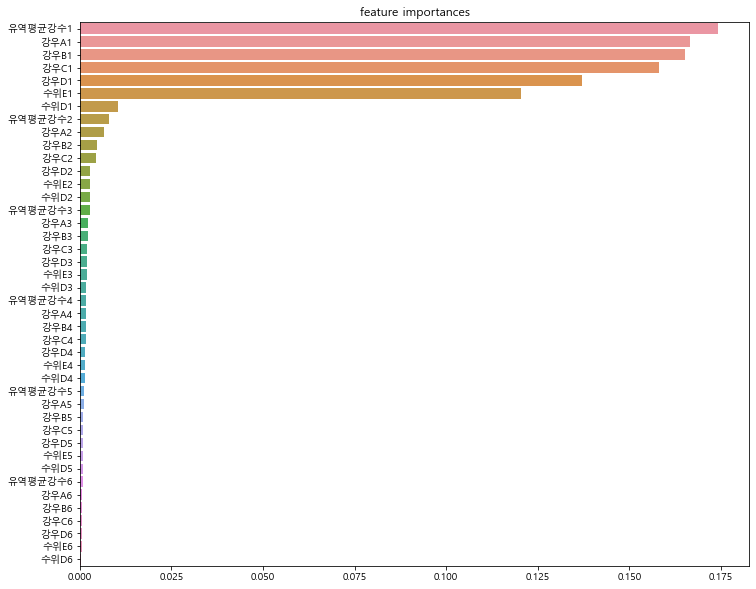

In [13]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

In [67]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [69]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [70]:
X['강우E1'] = X['유역평균강수1']*5 - X['강우A1'] - X['강우B1'] - X['강우C1'] - X['강우D1']
X['강우E2'] = X['유역평균강수2']*5 - X['강우A2'] - X['강우B2'] - X['강우C2'] - X['강우D2']
X['강우E3'] = X['유역평균강수3']*5 - X['강우A3'] - X['강우B3'] - X['강우C3'] - X['강우D3']
X['강우E4'] = X['유역평균강수4']*5 - X['강우A4'] - X['강우B4'] - X['강우C4'] - X['강우D4']
X['강우E5'] = X['유역평균강수5']*5 - X['강우A5'] - X['강우B5'] - X['강우C5'] - X['강우D5']
X['강우E6'] = X['유역평균강수6']*5 - X['강우A6'] - X['강우B6'] - X['강우C6'] - X['강우D6']

In [71]:
X = X.drop(['유역평균강수1', '유역평균강수2', '유역평균강수3', '유역평균강수4', '유역평균강수5', '유역평균강수6'], axis=1)

In [72]:
X = X.drop(X.iloc[:,0:5], axis=1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [74]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
predict = rf.predict(X_test)
expected = y_test

In [76]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 591.6070944229779


<function matplotlib.pyplot.show(close=None, block=None)>

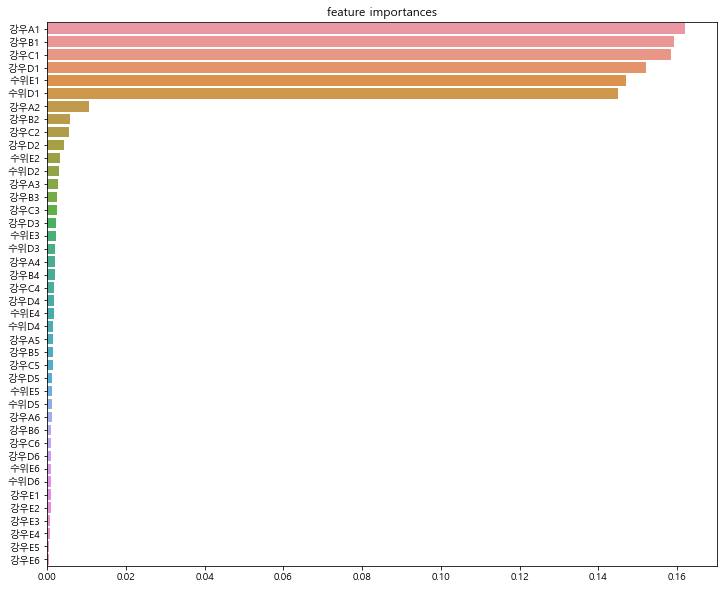

In [77]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

## 데이터 집단 1

In [171]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [172]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [173]:
X = X.drop(X.iloc[:, 11:], axis=1)

In [174]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수1,강우A1,강우B1,강우C1,강우D1,수위E1
0,1.0,2006.0,7.0,10.0,8.0,6.4,7,7,7,8,2.54
1,1.0,2006.0,7.0,10.0,9.0,6.3,7,8,7,8,2.53
2,1.0,2006.0,7.0,10.0,10.0,6.4,7,9,7,8,2.53
3,1.0,2006.0,7.0,10.0,11.0,7.3,7,10,7,8,2.53
4,1.0,2006.0,7.0,10.0,12.0,8.2,7,12,8,10,2.53


In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [176]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [177]:
predict = rf.predict(X_test)
expected = y_test

In [178]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 619.0122006654044


## 데이터 집단 2

In [199]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [200]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [201]:
X = X.drop(X.iloc[:, 5:12], axis=1)
X = X.drop(X.iloc[:, 12:], axis=1)

In [202]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수2,강우A2,강우B2,강우C2,강우D2,수위E2,수위D2
0,1.0,2006.0,7.0,10.0,8.0,6.3,7,7,7,8,2.54,122.541667
1,1.0,2006.0,7.0,10.0,9.0,6.4,7,8,7,8,2.53,122.550000
2,1.0,2006.0,7.0,10.0,10.0,7.3,7,9,7,8,2.53,122.558333
3,1.0,2006.0,7.0,10.0,11.0,8.2,7,10,8,8,2.53,122.566667
4,1.0,2006.0,7.0,10.0,12.0,11.3,9,12,10,10,2.53,122.575000


In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [204]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [205]:
predict = rf.predict(X_test)
expected = y_test

In [206]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 616.4481602029125


## 데이터 집단 3

In [225]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [226]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [227]:
X = X.drop(X.iloc[:, 5:19], axis=1)
X = X.drop(X.iloc[:, 12:], axis=1)

In [228]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수3,강우A3,강우B3,강우C3,강우D3,수위E3,수위D3
0,1.0,2006.0,7.0,10.0,8.0,6.3,7,7,7,8,2.54,122.550000
1,1.0,2006.0,7.0,10.0,9.0,6.4,7,8,7,8,2.53,122.558333
2,1.0,2006.0,7.0,10.0,10.0,7.3,7,9,8,8,2.53,122.566667
3,1.0,2006.0,7.0,10.0,11.0,8.2,7,10,10,10,2.53,122.575000
4,1.0,2006.0,7.0,10.0,12.0,11.3,9,12,10,11,2.53,122.575000


In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [230]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [231]:
predict = rf.predict(X_test)
expected = y_test

In [232]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 639.5533255143589


## 데이터 집단 4

In [233]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [234]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [235]:
X = X.drop(X.iloc[:, 5:26], axis=1)
X = X.drop(X.iloc[:, 12:], axis=1)

In [236]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수4,강우A4,강우B4,강우C4,강우D4,수위E4,수위D4
0,1.0,2006.0,7.0,10.0,8.0,6.4,7,7,8,8,2.54,122.675000
1,1.0,2006.0,7.0,10.0,9.0,7.3,7,8,10,10,2.53,122.667857
2,1.0,2006.0,7.0,10.0,10.0,8.2,7,9,10,11,2.53,122.660714
3,1.0,2006.0,7.0,10.0,11.0,11.3,9,10,15,14,2.53,122.653571
4,1.0,2006.0,7.0,10.0,12.0,14.4,12,12,18,16,2.53,122.639286


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [238]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [239]:
predict = rf.predict(X_test)
expected = y_test

In [240]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 543.0903121119221


## 데이터 집단 5

In [233]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [234]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [235]:
X = X.drop(X.iloc[:, 5:26], axis=1)
X = X.drop(X.iloc[:, 12:], axis=1)

In [236]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수4,강우A4,강우B4,강우C4,강우D4,수위E4,수위D4
0,1.0,2006.0,7.0,10.0,8.0,6.4,7,7,8,8,2.54,122.675000
1,1.0,2006.0,7.0,10.0,9.0,7.3,7,8,10,10,2.53,122.667857
2,1.0,2006.0,7.0,10.0,10.0,8.2,7,9,10,11,2.53,122.660714
3,1.0,2006.0,7.0,10.0,11.0,11.3,9,10,15,14,2.53,122.653571
4,1.0,2006.0,7.0,10.0,12.0,14.4,12,12,18,16,2.53,122.639286


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [238]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [239]:
predict = rf.predict(X_test)
expected = y_test

In [240]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 543.0903121119221


In [ ]:
ㅍ